In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data frame
path = r'C:\Users\Zarqa Ayub\Instacart Basket Analysis'
merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))


In [3]:
merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,Order frequency,First Name,Last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,28.0,6.0,11.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138.0,30.0,6.0,17.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138.0,1.0,5.0,13.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138.0,10.0,5.0,14.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138.0,9.0,6.0,12.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0


### Create a Histogram of "order_time_of_day"

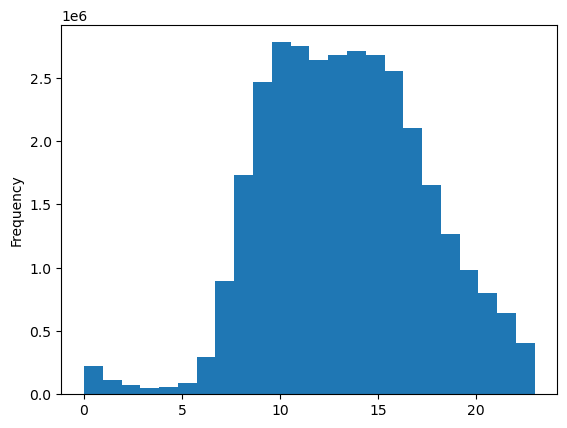

In [4]:
hist_order_time_of_day = merged['order_time_of_day'].plot.hist(bins = 24)

The histogram shows the times customers normally buy from instacart. As follows the busiest times of the day are between 1000 and 1600.

In [5]:
#exporting histogram
hist_order_time_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_order_time_of_day.png'))

### Create a bar chart from the "loyalty_flag" column

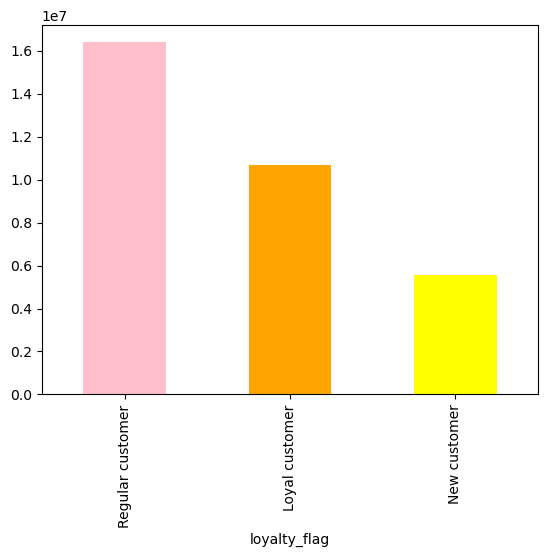

In [21]:
bar_loyalty_flag = merged['loyalty_flag'].value_counts().plot.bar(color = ['pink', 'orange','yellow'])

In [7]:
#exporting bar graph
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

### Create a line chart using sample data

In [8]:
#create sample from a list of random floating numbers 
np.random.seed(4)
dev = np.random.rand(len(merged)) <= 0.7

In [9]:
dev

array([False,  True, False, ..., False,  True,  True])

In [10]:
# splitting the merged dataframe into big and small
big = merged[dev]
small = merged[~dev]

In [11]:
# checking size of merged
len(merged)

32642461

In [12]:
# confirming the size of big + small
len(big) + len(small)

32642461

In [13]:
# working with the samples of merged df
merged_2 = small[['order_time_of_day', 'prices']]

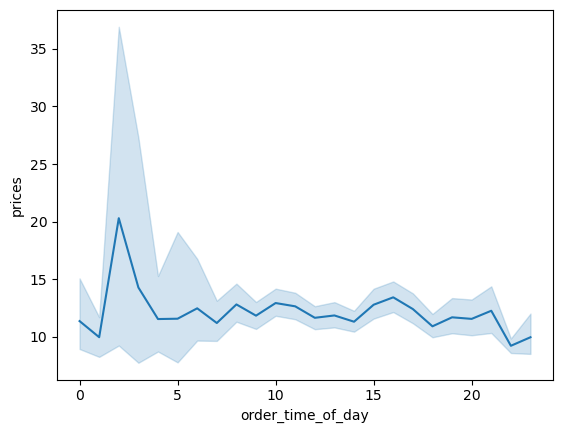

In [14]:
#creating the line graph
line_hour_of_day = sns.lineplot(data = merged_2, x = 'order_time_of_day', y = 'prices')

In [15]:
#exporting line_hour_of_day
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day.png'))

### Create a line chart to determine  relationship between age and family situation

In [16]:
merged_3 = small[['Age', 'n_dependants']]

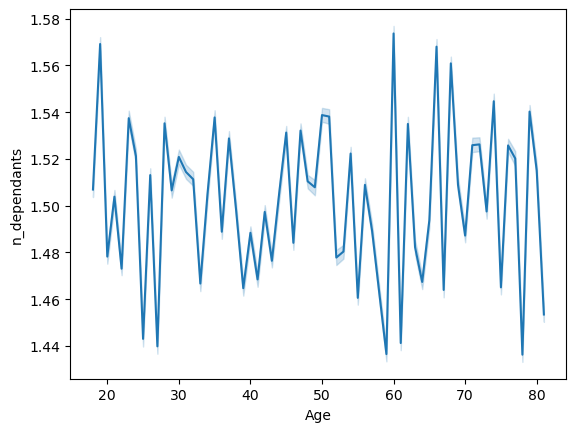

In [17]:
line_age_num_of_dependents = sns.lineplot(data = merged, x = 'Age', y = 'n_dependants')

There is no correlation between age and n_dependents.

### Create a scatter plot between Age and income

In [18]:
merged_4 = small[['Age', 'income']]

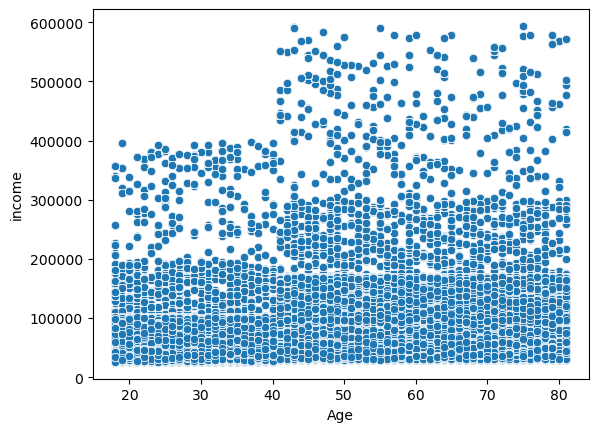

In [19]:
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = merged_4)

There is no relationship between the 2. But it there are higher earners after the age of 40 on average.

In [20]:
#exporting scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))